In [5]:
import matplotlib.pyplot as plt

INSIDE = 0  # 0000
LEFT = 1    # 0001
RIGHT = 2   # 0010
BOTTOM = 4  # 0100
TOP = 8     # 1000

def compute_code(x, y):
    code = INSIDE
    if x < xmin:
      code = code | LEFT
    if x > xmax:
      code = code | RIGHT
    if y < ymin:
      code = code | BOTTOM
    if y > ymax:
      code = code | TOP
    return code

def cohen_sutherland_clip(x1, y1, x2, y2 , xmin, ymin, xmax, ymax ):
    code1 = compute_code(x1, y1)
    code2 = compute_code(x2, y2)
    accept = False

    while True:        

        if code1 == 0 and code2 == 0:   
            accept = True
            break                        
        
        # Trivially reject
        elif code1 & code2:             
            break             
                   
        else:
            if code1:
                code_out = code1
            else:
                 code_out = code2

            if code_out & TOP:
                x = x1 + (x2 - x1) * (ymax - y1) / (y2 - y1)
                y = ymax
            elif code_out & BOTTOM:
                x = x1 + (x2 - x1) * (ymin - y1) / (y2 - y1)
                y = ymin
            elif code_out & RIGHT:
                y = y1 + (y2 - y1) * (xmax - x1) / (x2 - x1)
                x = xmax
            elif code_out & LEFT:
                y = y1 + (y2 - y1) * (xmin - x1) / (x2 - x1)
                x = xmin

            if code_out == code1:
                x1, y1 = x, y
                code1 = compute_code(x1, y1)
            else:
                x2, y2 = x, y
                code2 = compute_code(x2, y2)

    if accept:
        return (x1, y1, x2, y2)
    else:
        return None


def plot_line(x1 ,y1, x2, y2 , xmin, ymin, xmax, ymax ):
    clipped_line = cohen_sutherland_clip(x1, y1, x2, y2, xmin, ymin, xmax, ymax )
    fig, ax = plt.subplots()
    ax.set_xlim(0, 70)
    ax.set_ylim(0, 70)
    ax.plot([x1, x2], [y1, y2], 'r--', label="Original Line")

    if clipped_line:
        x1_clip, y1_clip, x2_clip, y2_clip = clipped_line
        ax.plot([x1_clip, x2_clip], [y1_clip, y2_clip], 'g-', label="Clipped Line")

    ax.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], 'b-')\

    ax.legend()
    plt.show()

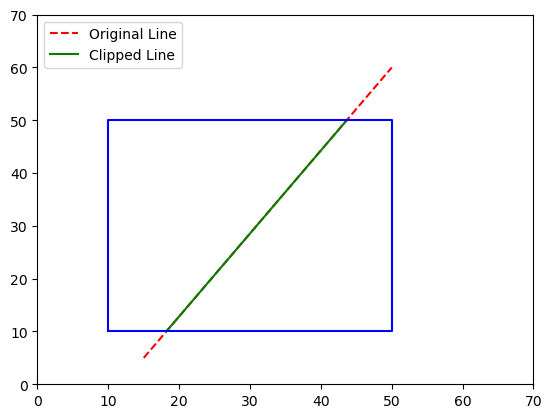

In [6]:
x1, y1, x2, y2 = 15, 5, 50, 60
xmin, ymin, xmax, ymax = 10, 10, 50, 50
plot_line(x1, y1, x2, y2 , xmin, ymin, xmax, ymax)

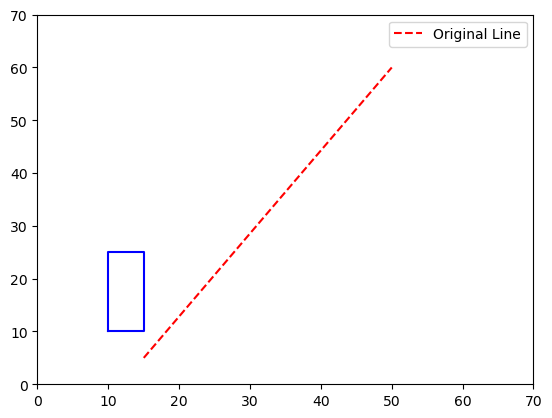

In [7]:
x1, y1, x2, y2 = 15, 5, 50, 60
xmin, ymin, xmax, ymax = 10, 10, 15, 25
plot_line(x1, y1, x2, y2 , xmin, ymin, xmax, ymax)